#### Import of Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [2]:
df = pd.read_csv('datasets/stress/stress.csv')


In [3]:
df.head(5)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [4]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

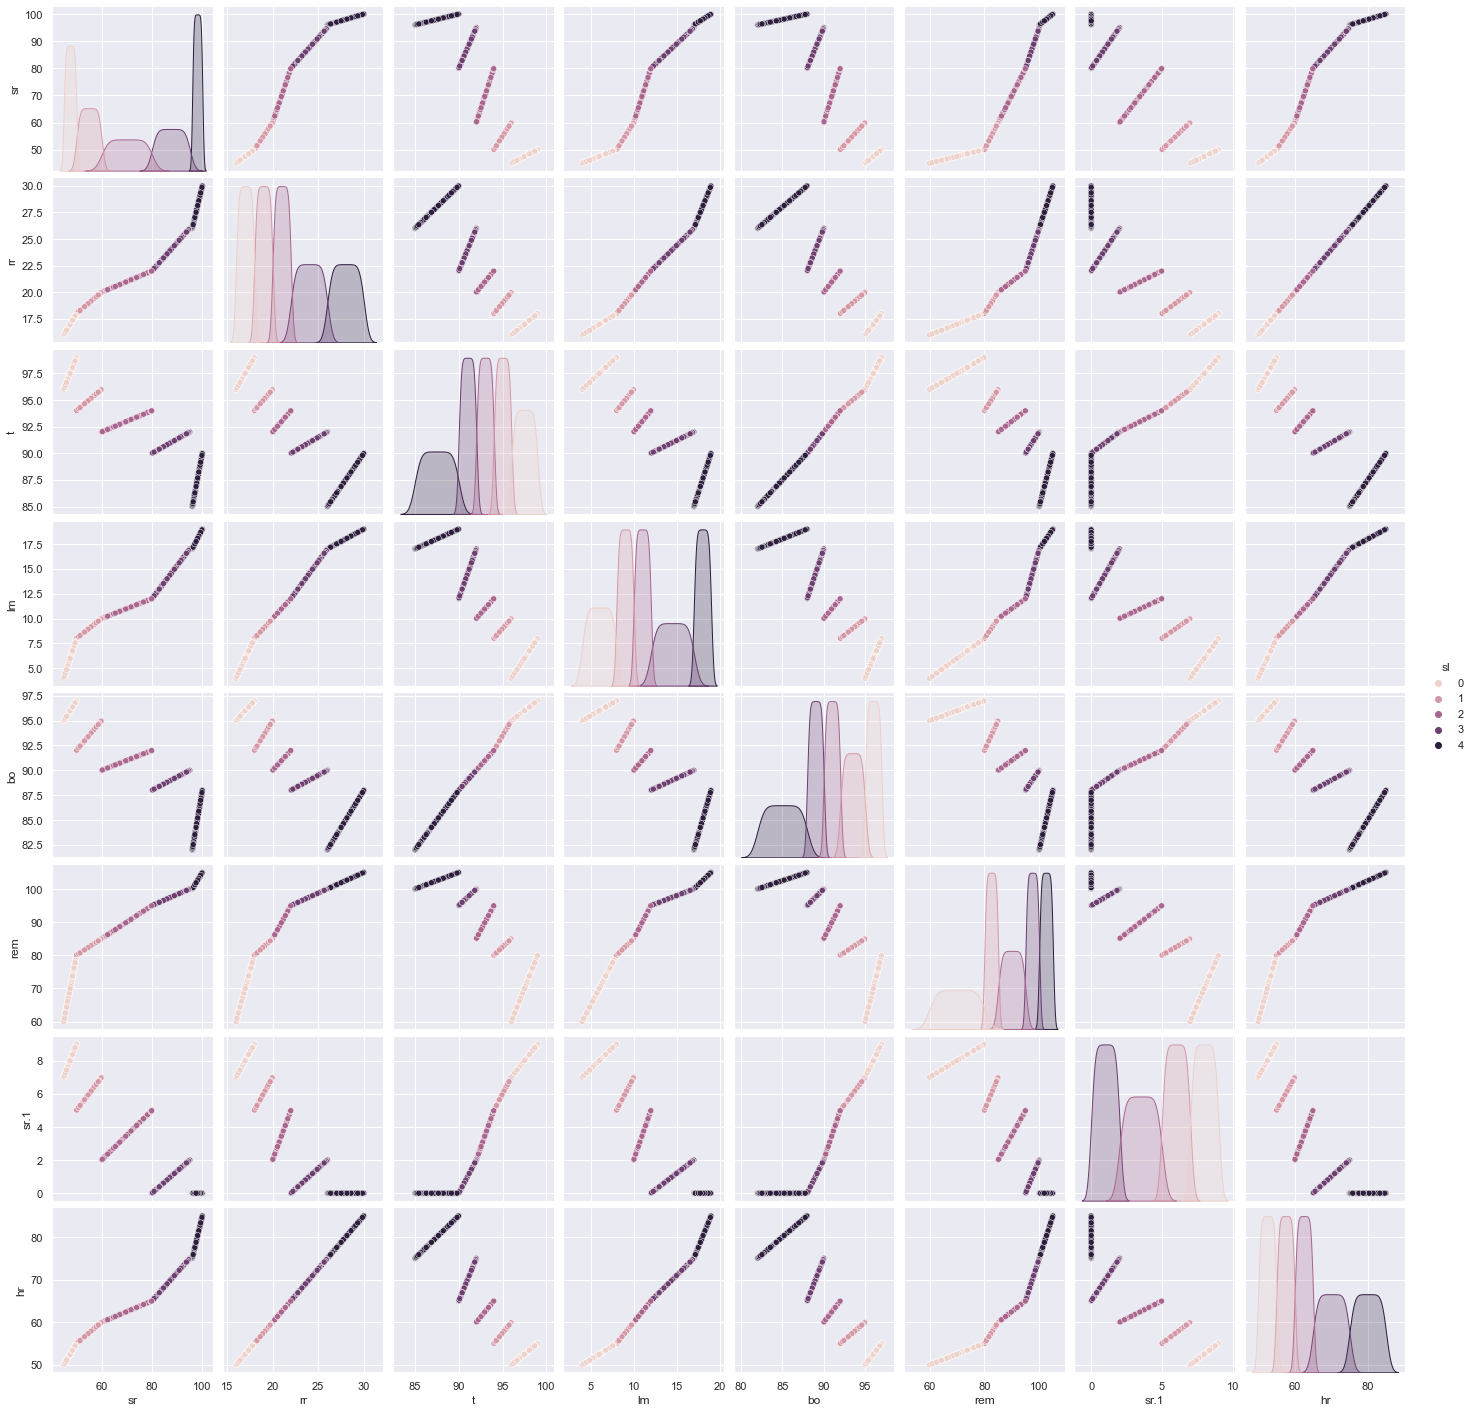

In [5]:
sns.pairplot(df, hue='sl')
plt.show()

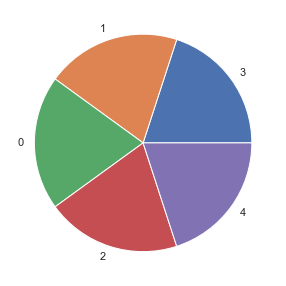

In [6]:
y =df['sl']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [7]:
X = df.drop(columns=['sl'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sr,630.0,71.6,19.372833,45.0,52.50,70.0,91.25,100.0
rr,630.0,21.8,3.966111,16.0,18.50,21.0,25.00,30.0
t,630.0,92.8,3.529690,85.0,90.50,93.0,95.50,99.0
lm,630.0,11.7,4.299629,4.0,8.50,11.0,15.75,19.0
bo,630.0,90.9,3.902483,82.0,88.50,91.0,94.25,97.0
rem,630.0,88.5,11.893747,60.0,81.25,90.0,98.75,105.0
sr.1,630.0,3.7,3.054572,0.0,0.50,3.5,6.50,9.0
hr,630.0,64.5,9.915277,50.0,56.25,62.5,72.50,85.0


#### Standardize the Data

In [8]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sr,630.0,2.904202e-16,1.000795,-1.374148,-0.986700,-0.082656,1.015113,1.467135
rr,630.0,-1.832749e-16,1.000795,-1.463552,-0.832711,-0.201869,0.807477,2.069159
t,630.0,8.007704e-16,1.000795,-2.211582,-0.652133,0.056707,0.765548,1.757924
lm,630.0,1.719965e-16,1.000795,-1.792275,-0.744842,-0.162934,0.942690,1.699170
bo,630.0,-1.452101e-15,1.000795,-2.282411,-0.615482,0.025645,0.859110,1.564349
rem,630.0,5.639228e-18,1.000795,-2.398121,-0.610048,0.126217,0.862482,1.388386
sr.1,630.0,-5.216286e-17,1.000795,-1.212261,-1.048442,-0.065528,0.917387,1.736483
hr,630.0,4.229421e-18,1.000795,-1.463552,-0.832711,-0.201869,0.807477,2.069159


#### Observations and Variables

In [9]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

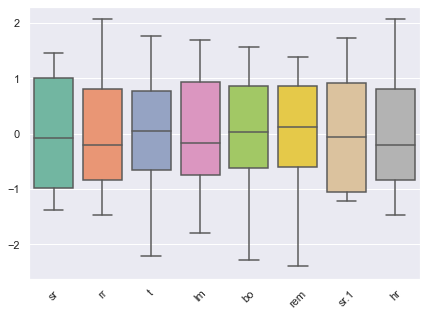

In [10]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

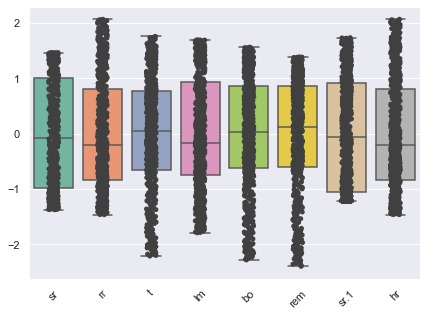

In [11]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

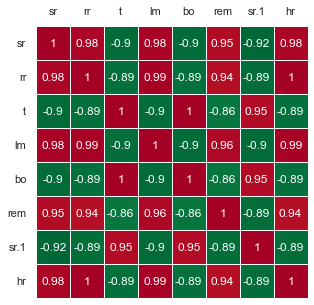

In [12]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [13]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [14]:
out['PC']

,PC1,PC2
0,-2.250047,-0.878675
1,-2.111753,-0.596370
2,1.844494,-0.801057
3,-1.735288,0.172126
4,3.661345,-0.330122
...,...,...
625,0.203803,0.160748
626,3.618319,-0.458267
627,-4.010066,0.330290
628,1.867121,-0.590271


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'2 Principal Components explain [99.01%] of the variance'}, xlabel='PC1 (93.7% expl.var)', ylabel='PC2 (4.07% expl.var)'>)

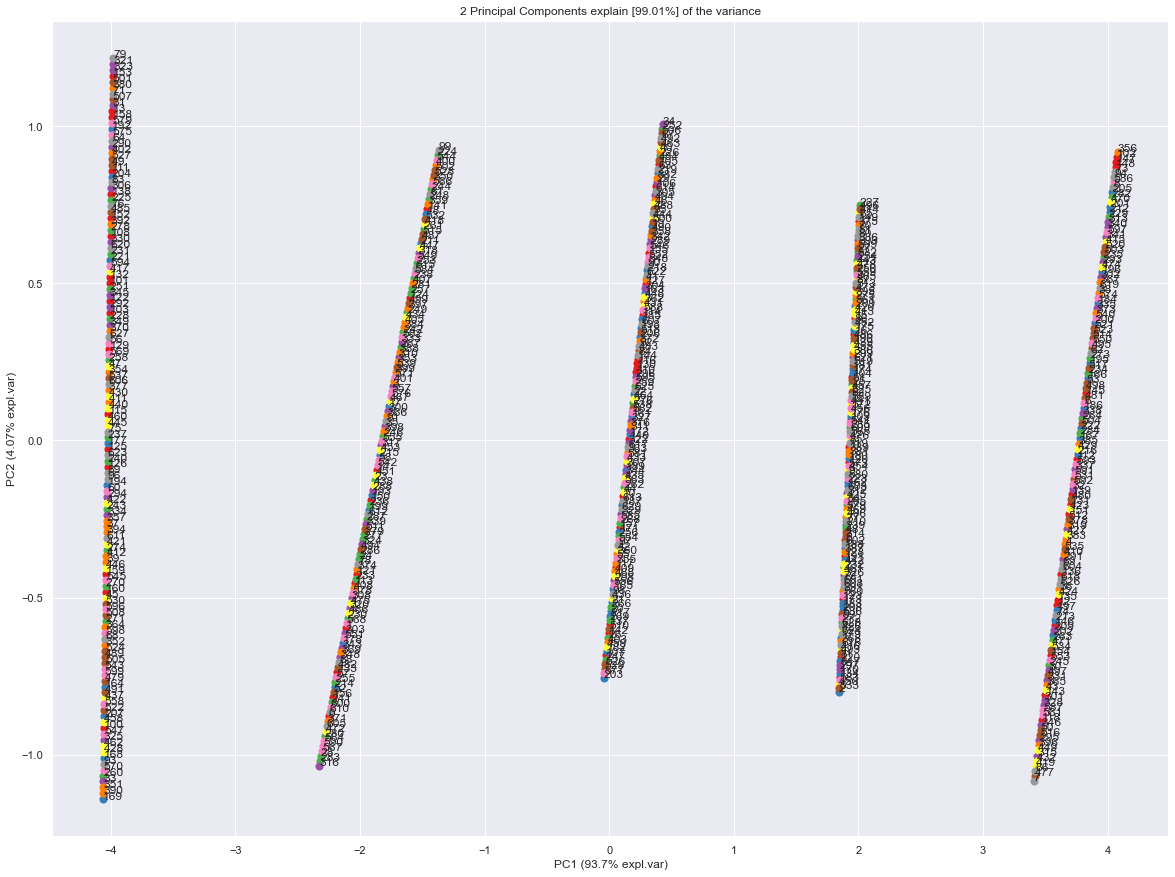

In [15]:
model.scatter(label=True, legend=False)

Eigenvectors

In [16]:
A = out['loadings'].T

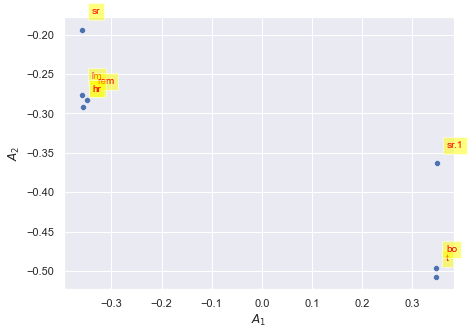

In [17]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

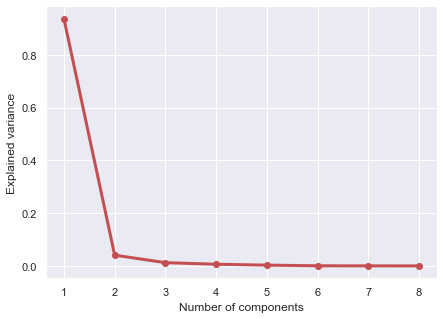

In [18]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

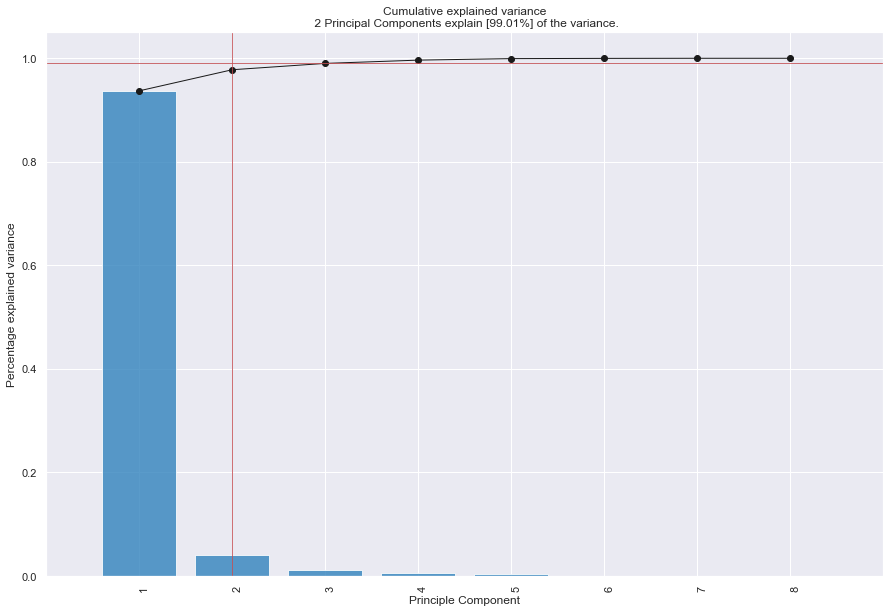

<Figure size 504x360 with 0 Axes>

In [19]:
model.plot();